In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('9_class_training.csv')

In [63]:
df.head()

,Unnamed: 0,article,category
0,24644,Global emissions targets will lead to 4C tempe...,CLIMATE
1,115540,Climate sceptics place bets on world cooling d...,SCIENCE
2,113058,This brain parasite can increase your chances ...,SOCIETY
3,79582,In pictures: RSPB's Big Garden Birdwatch - wha...,CLIMATE
4,76416,Duma wants convincing arguments for Kyoto rati...,BUSINESS


In [4]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,article,category
0,Global emissions targets will lead to 4C tempe...,CLIMATE
1,Climate sceptics place bets on world cooling d...,SCIENCE
2,This brain parasite can increase your chances ...,SOCIETY
3,In pictures: RSPB's Big Garden Birdwatch - wha...,CLIMATE
4,Duma wants convincing arguments for Kyoto rati...,BUSINESS


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127127 entries, 0 to 127126
Data columns (total 2 columns):
article     127127 non-null object
category    127127 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


## Categories are imbalanced

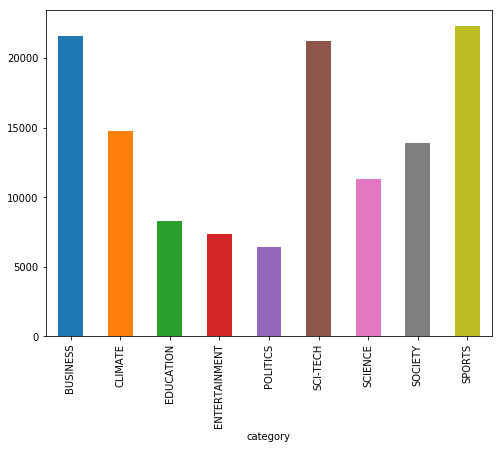

In [7]:
fig = plt.figure(figsize=(8,6))
df.groupby('category').category.count().plot.bar(ylim=0)
plt.show()

In [8]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import re

In [9]:
def lemmatizeWords(text):
    wn = WordNetLemmatizer()
    #sentence = sent_tokenize(text)
    words=word_tokenize(text)
    listLemma = []
    for w in words:
        x=wn.lemmatize(w,'v')
        listLemma.append(x)
    return text

In [10]:
def stopWordsRemove(text):
    stopWordList = set(stopwords.words('english'))
    wordList=[x.lower().strip() for x in word_tokenize(text)]
    removedList=[x for x in wordList if not x in stopWordList]
    text=' '.join(removedList)
    return text

In [11]:
def PreProcessing(text):
    text=lemmatizeWords(text)
    text=stopWordsRemove(text)
    return(text)

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n", "", text)    
    text = re.sub(r"\r", "", text) 
    #text = re.sub(r"[0-9]", "digit", text)   
    text = re.sub(r"what’s", "what is ", text)
    text = re.sub(r"\’s", " ", text)
    text = re.sub(r"\’ve", " have ", text)
    text = re.sub(r"can’t", "cannot ", text)
    text = re.sub(r"n’t", " not ", text)
    text = re.sub(r"i’m", "i am ", text)
    text = re.sub(r"\’re", " are ", text)
    text = re.sub(r"\’d", " would ", text)
    text = re.sub(r"\’ll", " will ", text)
    text = re.sub(r"\’scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [13]:
df.article = df.article.map(lambda x : clean_text(x))
df.article = df.article.map(lambda x : PreProcessing(x))

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127127 entries, 0 to 127126
Data columns (total 2 columns):
article     127127 non-null object
category    127127 non-null object
dtypes: object(2)
memory usage: 1.9+ MB


In [15]:
df.article[0]

'global emissions targets lead 4c temperature rise say studies world heading average temperature rise nearly 4c 7f according analysis national pledges around globe rise would bring high risk major extinctions threats food supplies near total collapse huge greenland ice sheet 100 heads state agreed copenhagen last december limit rise global temperatures 1 5c 2c 2 7 3 6f long term average industrial revolution kickstarted massive global increase greenhouse gases blamed warming planet triggering climate change six months major international effort monitor emissions reductions targets 60 countries including major economies climate interactive scoreboard calculates world course rise nearly double stated goal 2100 another study climate analytics potsdam institute germany suggests virtually chance world governments keep temperature rise 2c rise likely 3 5c 6 3f end century analyses current commitments suggest much better outcome estimated business usual temperature rise 4 8c 8 6f well 2c maxi

In [16]:
# totalText=''
# for x in df.article:
#     totalText=totalText+x
    
# from wordcloud import WordCloud
# wc=WordCloud(background_color='black',max_font_size=50).generate(totalText)
# plt.figure(figsize=(16,12))
# plt.imshow(wc, interpolation='bilinear')

In [17]:
processed_df = df.to_csv('processed.csv',index = False)

In [18]:
#processed_df = pd.read_csv('processed.csv')

In [19]:
df['category_id'] = df.category.factorize()[0]

In [20]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [21]:
category_id_df

,category,category_id
0,CLIMATE,0
1,SCIENCE,1
2,SOCIETY,2
4,BUSINESS,3
5,SCI-TECH,4
6,SPORTS,5
14,ENTERTAINMENT,6
26,POLITICS,7
34,EDUCATION,8


In [22]:
category_to_id

{'CLIMATE': 0,
 'SCIENCE': 1,
 'SOCIETY': 2,
 'BUSINESS': 3,
 'SCI-TECH': 4,
 'SPORTS': 5,
 'ENTERTAINMENT': 6,
 'POLITICS': 7,
 'EDUCATION': 8}

In [23]:
id_to_category

{0: 'CLIMATE',
 1: 'SCIENCE',
 2: 'SOCIETY',
 3: 'BUSINESS',
 4: 'SCI-TECH',
 5: 'SPORTS',
 6: 'ENTERTAINMENT',
 7: 'POLITICS',
 8: 'EDUCATION'}

In [24]:
df.head()

,article,category,category_id
0,global emissions targets lead 4c temperature r...,CLIMATE,0
1,climate sceptics place bets world cooling sola...,SCIENCE,1
2,brain parasite increase chances road rage toxo...,SOCIETY,2
3,pictures rspb big garden birdwatch spot rspb a...,CLIMATE,0
4,duma wants convincing arguments kyoto ratifica...,BUSINESS,3


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [26]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.article, df.category_id, test_size=0.3, random_state=5)

In [27]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_df=0.5,min_df=2)

In [28]:
tfidf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [29]:
train_vectors = tfidf_vect.transform(X_train)

In [30]:
test_vectors = tfidf_vect.transform(X_test)

In [31]:
##passing parameter class_weight = 'balanced' to give less weights to majority classes
oneVsRestSVC = OneVsRestClassifier(LinearSVC(class_weight='balanced'))

In [32]:
oneVsRestSVC.fit(train_vectors,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1)

In [33]:
pred = oneVsRestSVC.predict(test_vectors)

In [34]:
pred.shape

(38139,)

In [35]:
print(classification_report(y_test,pred,target_names=category_to_id)) 

               precision    recall  f1-score   support

      CLIMATE       0.97      0.97      0.97      4474
      SCIENCE       0.97      0.95      0.96      3418
      SOCIETY       0.98      0.97      0.98      4195
     BUSINESS       0.93      0.91      0.92      6533
     SCI-TECH       0.91      0.92      0.91      6322
       SPORTS       0.98      0.99      0.99      6705
ENTERTAINMENT       0.99      0.99      0.99      2232
     POLITICS       0.99      0.98      0.99      1868
    EDUCATION       0.98      0.99      0.99      2392

  avg / total       0.96      0.96      0.96     38139



In [36]:
oneVsRestNB = OneVsRestClassifier(MultinomialNB())

In [37]:
oneVsRestNB.fit(train_vectors,y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1)

In [38]:
predNB = oneVsRestNB.predict(test_vectors)

In [39]:
predNB.shape

(38139,)

In [40]:
print(classification_report(y_test,predNB,target_names=category_to_id))

               precision    recall  f1-score   support

      CLIMATE       0.70      0.99      0.82      4474
      SCIENCE       0.90      0.76      0.82      3418
      SOCIETY       0.86      0.92      0.89      4195
     BUSINESS       0.92      0.86      0.89      6533
     SCI-TECH       0.92      0.78      0.85      6322
       SPORTS       0.98      0.99      0.98      6705
ENTERTAINMENT       0.98      0.92      0.95      2232
     POLITICS       0.97      0.92      0.94      1868
    EDUCATION       0.98      0.94      0.96      2392

  avg / total       0.91      0.90      0.90     38139



In [41]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [42]:
# modelList = {
#     'LogisticReg': OneVsRestClassifier(LogisticRegression()),
#     'oneVsRestNB': OneVsRestClassifier(MultinomialNB()),
#     'oneVsRestNB': MultinomialNB(),
#     'SVC': OneVsRestClassifier(LinearSVC()),
#     'SVC': OneVsRestClassifier(LinearSVC(class_weight='balanced'))
# }

# param = {
#     'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
#     'vectorizer__max_df':[0.50,0.70],
# }

In [43]:
# scores = {}
# for clf in modelList.items():
#     model = Pipeline([('vectorizer',TfidfVectorizer(min_df=2)),clf])
#     gs_clf = GridSearchCV(estimator=model, param_grid=param, cv = 5,scoring = 'f1')
#     gs_clf = gs_clf.fit(X_train,y_train)
#     scores.update({clf:gs_clf.score})

In [44]:
# gs_clf = GridSearchCV(modelList, param, cv = 5)

In [45]:
# gs_clf = gs_clf.fit(X_train,y_train)

In [46]:
import pickle

In [47]:
#Saving the SVC model
filename = 'finalized_model.sav'
pickle.dump(oneVsRestSVC, open(filename, 'wb'))

In [48]:
tfidfmodel = 'tfidf_model.sav'
pickle.dump(tfidf_vect, open(tfidfmodel, 'wb'))

## testing saved model

In [49]:
tfidfvect = pickle.load(open(tfidfmodel, 'rb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [50]:
texts = ['The climate is windy and the temperature is high']
text_feats = tfidfvect.transform(texts)
loaded_model.predict(text_feats)

array([0], dtype=int64)

In [53]:
import bz2

In [54]:
with bz2.BZ2File('tfidf_model.pbz2', 'w') as f:
    pickle.dump(tfidf_vect, f)

In [55]:
with bz2.BZ2File('finalized_model.pbz2', 'w') as f:
    pickle.dump(oneVsRestSVC, f)

In [57]:
with bz2.open(f'finalized_model.pbz2', 'rb') as f:
        model = pickle.load(f)

In [58]:
with bz2.open(f'tfidf_model.pbz2', 'rb') as f:
        tf = pickle.load(f)

In [59]:
a = tf.transform(["temperature"])

In [60]:
model.predict(a)

array([0], dtype=int64)